# ABCD Method for estimating the Z-QCD correction factors.

In [1]:
import os
import sys
import matplotlib.pyplot as plt
print("Adding the following path to sys.path:", os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd())) # Needed to load all the modules in the parent directory
from histogramHelpers import biner,normalization,ratioDataMinusBG

Adding the following path to sys.path: /Users/user/Documents/HEP/VBF-Analysis


## Test if EWjj model makes a difference in CRs

INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]
INFO: Using bin edges =  [   0.  250.  500.  750. 1000. 1250. 1500. 2000. 2500. 3000. 4000. 5000.]


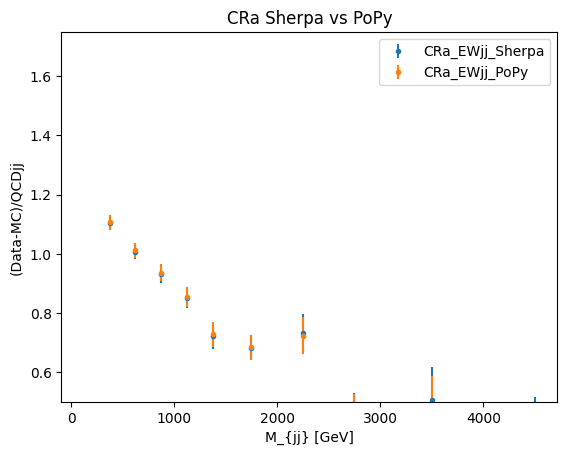

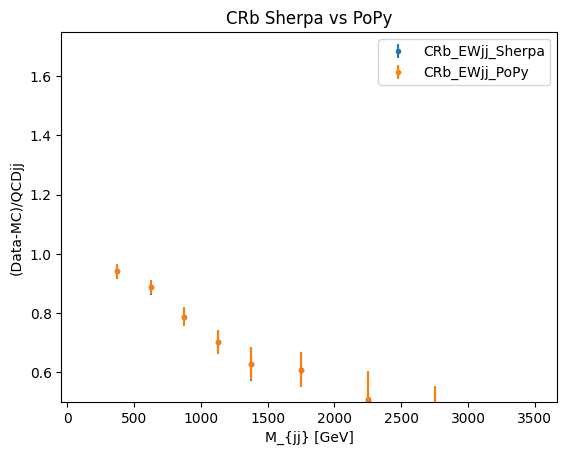

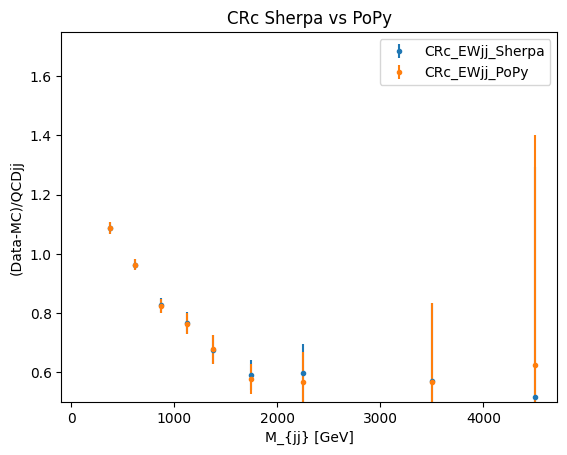

In [2]:
root_path = '/Users/user/Documents/HEP/VBF-Analysis/VBFAnalysisPlots/Zll/Z-peak/'
path_CRa = root_path+"CRa"
path_CRb = root_path+"CRb"
path_CRc = root_path+"CRc"
signal = "Zll_Sherpa"

histo={
"mass_jj":[[1500,3000],[250,500,1000],250],
}

scaleFactors = {"Signal_Sherpa":1.0,"Signal_PoPy":1.0}

# Sherpa for EWjj
EWjjSample = "Signal_Sherpa"
bg_samples = [EWjjSample,"VV","Wjets","ttbar","singletop"]
CRa_axis,CRa_y,CRa_error=ratioDataMinusBG(path_to_samples=path_CRa,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRb_axis,CRb_y,CRb_error=ratioDataMinusBG(path_to_samples=path_CRb,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRc_axis,CRc_y,CRc_error=ratioDataMinusBG(path_to_samples=path_CRc,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)

# Powheg+Pythia for EWjj + scaling
EWjjSample = "Signal_PoPy"
bg_samples = [EWjjSample,"VV","Wjets","ttbar","singletop"]
CRa2_axis,CRa2_y,CRa2_error=ratioDataMinusBG(path_to_samples=path_CRa,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRb2_axis,CRb2_y,CRb2_error=ratioDataMinusBG(path_to_samples=path_CRb,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)
CRc2_axis,CRc2_y,CRc2_error=ratioDataMinusBG(path_to_samples=path_CRc,signal_name=signal,data_name="Data",bg_names=bg_samples,histogram_info=histo,SFs=scaleFactors)


# Plot CRa
plt.errorbar(CRa_axis,CRa_y,yerr=CRa_error,fmt='.')
plt.errorbar(CRa2_axis,CRa2_y,yerr=CRa2_error,fmt='.')
plt.legend(['CRa_EWjj_Sherpa','CRa_EWjj_PoPy'])
plt.xlabel('M_{jj} [GeV]')
plt.ylabel('(Data-MC)/QCDjj')
plt.title('CRa Sherpa vs PoPy')
plt.ylim(0.5,1.75)
plt.show()
# Plot CRb
plt.errorbar(CRb_axis,CRb_y,yerr=CRb_error,fmt='.')
plt.errorbar(CRb2_axis,CRb2_y,yerr=CRb2_error,fmt='.')
plt.legend(['CRb_EWjj_Sherpa','CRb_EWjj_PoPy'])
plt.xlabel('M_{jj} [GeV]')
plt.ylabel('(Data-MC)/QCDjj')
plt.title('CRb Sherpa vs PoPy')
plt.ylim(0.5,1.75)
plt.show()
# Plot CRc
plt.errorbar(CRc_axis,CRc_y,yerr=CRc_error,fmt='.')
plt.errorbar(CRc2_axis,CRc2_y,yerr=CRc2_error,fmt='.')
plt.legend(['CRc_EWjj_Sherpa','CRc_EWjj_PoPy'])
plt.xlabel('M_{jj} [GeV]')
plt.ylabel('(Data-MC)/QCDjj')
plt.title('CRc Sherpa vs PoPy')
plt.ylim(0.5,1.75)
plt.show()

## Using mid point in the bins for the fit

In [3]:
print('X axis being used for fits:', CRa_axis, 'GeV')

X axis being used for fits: [ 125.  375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.] GeV


In [4]:
from MjjFit import linear_model, parabolic_model, mjj_fit_experiment, FitExperimentContainer

experiments = FitExperimentContainer()

# Sherpa for EWjj
CRa_fit_line, CRa_cov_line = mjj_fit_experiment(linear_model, CRa_axis[1:], CRa_y[1:], CRa_error[1:], experiment_name="CRa_EWjjSherpa_QCDjjSherpa_line", experiments_container=experiments)
CRa_fit, CRa_cov = mjj_fit_experiment(parabolic_model, CRa_axis[1:], CRa_y[1:], CRa_error[1:], experiment_name="CRa_EWjjSherpa_QCDjjSherpa_parabola", experiments_container=experiments)
CRb_fit, CRb_cov = mjj_fit_experiment(parabolic_model, CRb_axis[1:], CRb_y[1:], CRb_error[1:], experiment_name="CRb_EWjjSherpa_QCDjjSherpa_parabola", experiments_container=experiments)
CRc_fit, CRc_cov = mjj_fit_experiment(parabolic_model, CRc_axis[1:], CRc_y[1:], CRc_error[1:], experiment_name="CRc_EWjjSherpa_QCDjjSherpa_parabola", experiments_container=experiments)

# Powheg+Pythia for EWjj + scaling
CRa2_fit, CRa2_cov = mjj_fit_experiment(parabolic_model, CRa2_axis[1:], CRa2_y[1:], CRa2_error[1:], experiment_name="CRa_EWjjPoPy_QCDjjSherpa_parabola", experiments_container=experiments)
CRb2_fit, CRb2_cov = mjj_fit_experiment(parabolic_model, CRb2_axis[1:], CRb2_y[1:], CRb2_error[1:], experiment_name="CRb2_EWjjPoPy_QCDjjSherpa_parabola", experiments_container=experiments)
CRc2_fit, CRc2_cov = mjj_fit_experiment(parabolic_model, CRc2_axis[1:], CRc2_y[1:], CRc2_error[1:], experiment_name="CRc2_EWjjPoPy_QCDjjSherpa_parabola", experiments_container=experiments)
x = CRa_axis


INFO: Adding new experiment CRa_EWjjSherpa_QCDjjSherpa_line. 
INFO: Adding new experiment CRa_EWjjSherpa_QCDjjSherpa_parabola. 
INFO: Adding new experiment CRb_EWjjSherpa_QCDjjSherpa_parabola. 
INFO: Adding new experiment CRc_EWjjSherpa_QCDjjSherpa_parabola. 
INFO: Adding new experiment CRa_EWjjPoPy_QCDjjSherpa_parabola. 
INFO: Adding new experiment CRb2_EWjjPoPy_QCDjjSherpa_parabola. 
INFO: Adding new experiment CRc2_EWjjPoPy_QCDjjSherpa_parabola. 


INFO: Displaying the figure without saving. 


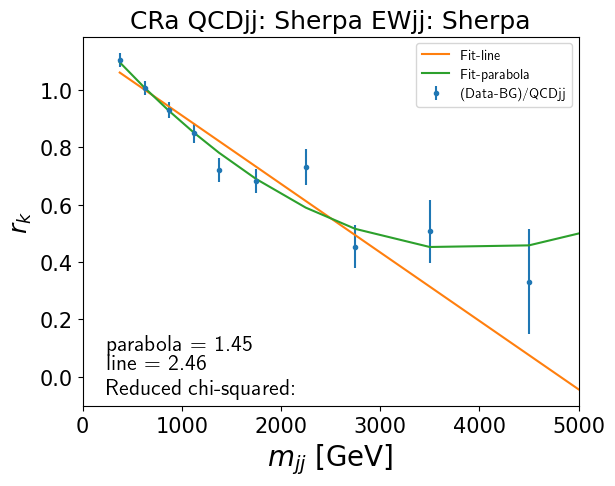

In [5]:
from MjjFit import display_fit_experiments
display_fit_experiments(experiments, "CRa", ["CRa_EWjjSherpa_QCDjjSherpa_line", "CRa_EWjjSherpa_QCDjjSherpa_parabola"])

INFO: Displaying the figure without saving. 


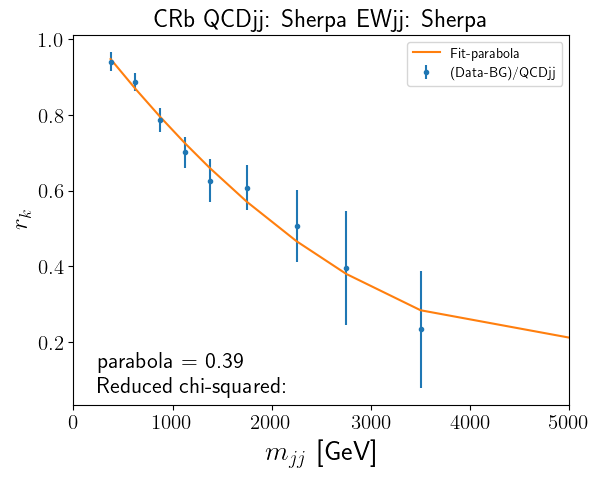

In [6]:
display_fit_experiments(experiments, "CRb", ["CRb_EWjjSherpa_QCDjjSherpa_parabola"])

INFO: Displaying the figure without saving. 


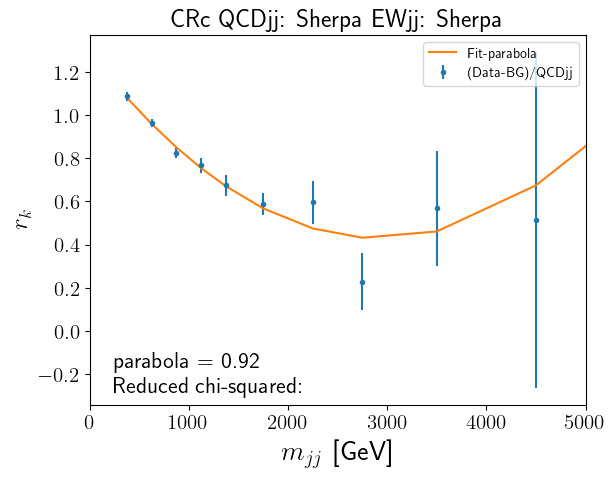

In [7]:
display_fit_experiments(experiments, "CRc", ["CRc_EWjjSherpa_QCDjjSherpa_parabola"])

## Plot ratios of shapes between CRs

In [11]:
def model_uncern(covariance_matrix,x):
    sigma_a = covariance_matrix[0][0]
    sigma_b = covariance_matrix[1][1]
    sigma_c = covariance_matrix[2][2]
    
    cov_ab = covariance_matrix[0][1]
    cov_ac = covariance_matrix[0][2]
    cov_bc = covariance_matrix[1][2]
    
    diagonal_term = sigma_a*x**4 + sigma_b*x**2 + sigma_c
    no_diagonal_term = 2*cov_ab*x**3 + 2*cov_ac*x**2 + 2*cov_bc*x
    
    return np.sqrt(diagonal_term+no_diagonal_term)

model_uncer = np.vectorize(model_uncern)
#parabolic_shape = np.vectorize(parabolic_shape)

0.6589188790713523
0.7568291459829054


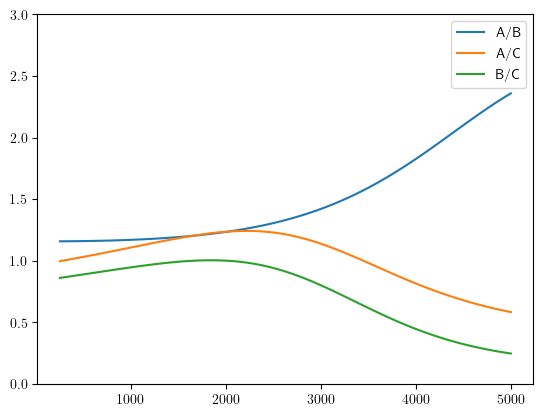

In [13]:
x=np.linspace(250,5000,100)

parabolic_shape = parabolic_model

r_ab=parabolic_shape(x,CRa_fit[0],CRa_fit[1],CRa_fit[2])/parabolic_shape(x,CRb_fit[0],CRb_fit[1],CRb_fit[2])
r_ab_error=r_ab*np.sqrt((model_uncern(CRa_cov,x)/parabolic_shape(x,CRa_fit[0],CRa_fit[1],CRa_fit[2]))**2
                        +(model_uncern(CRb_cov,x)/parabolic_shape(x,CRb_fit[0],CRb_fit[1],CRb_fit[2])**2))

r_ac=parabolic_shape(x,CRa_fit[0],CRa_fit[1],CRa_fit[2])/parabolic_shape(x,CRc_fit[0],CRc_fit[1],CRc_fit[2])
r_ac_error=r_ac*np.sqrt((model_uncern(CRa_cov,x)/parabolic_shape(x,CRa_fit[0],CRa_fit[1],CRa_fit[2]))**2
                        +(model_uncern(CRc_cov,x)/parabolic_shape(x,CRc_fit[0],CRc_fit[1],CRc_fit[2])**2))

r_bc=parabolic_shape(x,CRb_fit[0],CRb_fit[1],CRb_fit[2])/parabolic_shape(x,CRc_fit[0],CRc_fit[1],CRc_fit[2])
r_bc_error=r_bc*np.sqrt((model_uncern(CRb_cov,x)/parabolic_shape(x,CRb_fit[0],CRb_fit[1],CRb_fit[2]))**2
                        +(model_uncern(CRc_cov,x)/parabolic_shape(x,CRc_fit[0],CRc_fit[1],CRc_fit[2])**2))



plt.plot(x,r_ab)
plt.plot(x,r_ac)
plt.plot(x,r_bc)
plt.legend(["A/B","A/C","B/C"])
plt.ylim(0,3)


print(r_ac.max()-r_ac.min())
print(r_bc.max()-r_bc.min())

In [8]:

from MjjFit import parabolic_cutoff_model, parabolic_cutoff_model_uncern, parabolic_model
import numpy as np
parabolic_cutoff_model = np.vectorize(parabolic_cutoff_model, excluded=['a','b','c','mass_limit','level'])
parabolic_cutoff_model(x,*CRa_fit,2750,1.34)


x=CRa_axis
# Sherpa for EWjj
CRa_predy,CRa_prederror = parabolic_cutoff_model(x,*CRa_fit,2750,1.34),parabolic_cutoff_model_uncern(CRa_cov,x,2750,0.9)
CRb_predy,CRb_prederror = parabolic_cutoff_model(x,*CRb_fit,2250,0.882),parabolic_cutoff_model_uncern(CRb_cov,x,2250,0.45)
CRc_predy,CRc_prederror = parabolic_cutoff_model(x,*CRc_fit,2250,0.947),parabolic_cutoff_model_uncern(CRc_cov,x,2250,0.8)

SR_y = CRa_predy*CRc_predy/CRb_predy
SR_error = SR_y*np.sqrt((CRa_prederror/CRa_predy)**2+(CRb_prederror/CRb_predy)**2+(CRc_prederror/CRc_predy)**2)

# Powheg+Pythia for EWjj + scaling
CRa2_predy,CRa2_prederror = parabolic_model(x,CRa2_fit[0],CRa2_fit[1],CRa2_fit[2]),parabolic_cutoff_model_uncern(CRa2_cov,x)
CRb2_predy,CRb2_prederror = parabolic_model(x,CRb2_fit[0],CRb2_fit[1],CRb2_fit[2]),parabolic_cutoff_model_uncern(CRb2_cov,x)
CRc2_predy,CRc2_prederror = parabolic_model(x,CRc2_fit[0],CRc2_fit[1],CRc2_fit[2]),parabolic_cutoff_model_uncern(CRc2_cov,x)

SR2_y = CRa2_predy*CRc2_predy/CRb2_predy
SR2_error = SR2_y*np.sqrt((CRa2_prederror/CRa2_predy)**2+(CRb2_prederror/CRb2_predy)**2+(CRc2_prederror/CRc2_predy)**2)

Bins =  [ 125.  375.  625.  875. 1125. 1375. 1750. 2250. 2750. 3500. 4500.]
SF (SherpaEWjj) =  [np.float64(1.4074965634578458), np.float64(1.2536099232835818), np.float64(1.1155381389212968), np.float64(0.9931570774247015), np.float64(0.8863791510415034), np.float64(0.7951797222270777), np.float64(0.6877989048881937), np.float64(0.6013889844093069), np.float64(0.5539160403410238), np.float64(1.43875283446712), np.float64(1.43875283446712)]
SF error (SherpaEWjj) =  [np.float64(0.05549640890236516), np.float64(0.03434131594083432), np.float64(0.023423114291818935), np.float64(0.023975502363333696), np.float64(0.029457520027649804), np.float64(0.03504422976793258), np.float64(0.04323417513266551), np.float64(0.06397971039962606), np.float64(0.5482085421930915), np.float64(1.7175191531766607), np.float64(1.7175191531766607)]
SF (PoPyEWjj) =  [np.float64(1.4119139382068926), np.float64(1.2575226565074344), np.float64(1.1181475221624277), np.float64(0.9937239160365072), np.float64(0.88421528

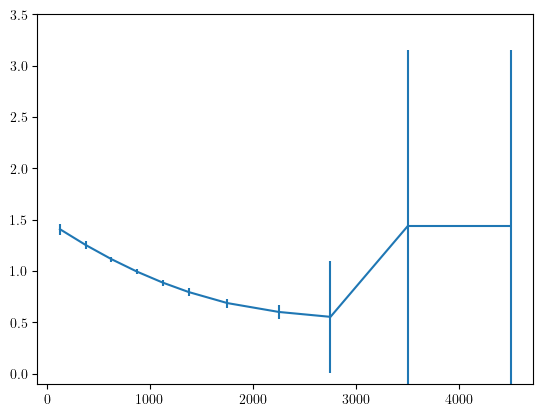

In [9]:
plt.errorbar(x,SR_y,yerr=SR_error)
plt.ylim([-.1,3.5])

print("Bins = ",x)
print("SF (SherpaEWjj) = ",list(SR_y))
print("SF error (SherpaEWjj) = ",list(SR_error))

print("SF (PoPyEWjj) = ",list(SR2_y))
print("SF error (PoPyEWjj) = ",list(SR2_error))


In [ ]:

SR_fit, SR_cov = mjj_fit_experiment(parabolic_model, x, SR_y, SR_error, experiment_name="SR_EWjjSherpa_QCDjjSherpa_parabola", experiments_container=experiments)
SR2_fit, SR2_cov = mjj_fit_experiment(parabolic_model, x, SR2_y, SR2_error, experiment_name="SR_EWjjPopy_QCDjjSherpa_parabola", experiments_container=experiments)

display_fit_experiments(experiments, "SR", ["SR_EWjjSherpa_QCDjjSherpa_parabola"])

INFO: Adding new experiment SR_EWjjSherpa_QCDjjSherpa_parabola. 
INFO: Adding new experiment SR_EWjjPopy_QCDjjSherpa_parabola. 


INFO: Displaying the figure without saving. 


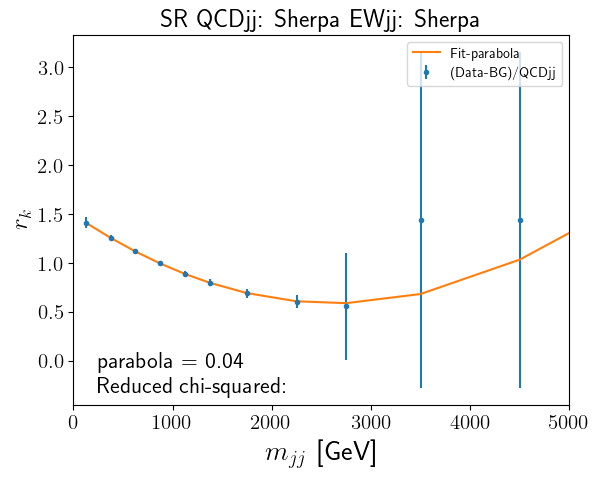

Sherpa for EWjj
Parameters  [ 1.29830481e-07 -6.86843827e-04  1.49385118e+00]
Covariance Matrix [[ 4.37933180e-17 -9.78166324e-14  4.33532108e-11]
 [-9.78166324e-14  2.38588201e-10 -1.15458387e-07]
 [ 4.33532108e-11 -1.15458387e-07  6.46145813e-05]]


NameError: name 'pd' is not defined

In [ ]:
from MjjFit import convert_fit_result_to_dataframe

# Sherpa for EWjj
print("Sherpa for EWjj")
print("Parameters ",SR_fit)
print("Covariance Matrix",SR_cov)
print(convert_fit_result_to_dataframe(SR_fit,SR_cov,['a','b','c']))
print("\n")

# Powheg+Pythia for EWjj + scaling
print("Powheg+Pythia for EWjj + scaling")
print("Parameters ",SR2_fit)
print("Covariance Matrix",SR2_cov)
print(convert_fit_result_to_dataframe(SR2_fit,SR2_cov,['a','b','c']))

convert_fit_result_to_dataframe(CRc_fit,CRc_cov,['a','b','c'])

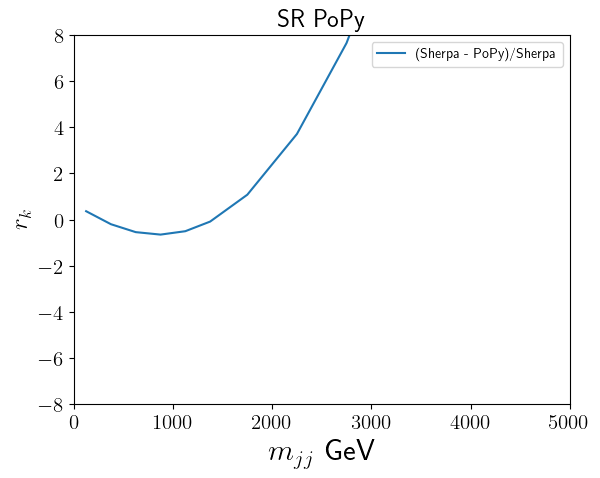

In [14]:
difference=100*(parabolic_shape(X,SR_fit[0],SR_fit[1],SR_fit[2])-parabolic_shape(X,SR2_fit[0],SR2_fit[1],SR2_fit[2]))/parabolic_shape(X,SR_fit[0],SR_fit[1],SR_fit[2])
plt.ylim([-8,8])
plt.plot(X,difference,label='(Sherpa - PoPy)/Sherpa')
plt.legend()
plt.xlabel(r'$m_{jj}$ GeV',fontsize=22)
plt.ylabel(r'$r_{k}$',fontsize=18)
plt.xlim(0,5000)
plt.title("SR "+signal[4:],fontsize=18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.savefig("SR "+signal+'.pdf',bbox_inches='tight')

In [40]:
path="../Zll/"
qcd_sample="Zll_Sherpa.root"
vbf_sample="Signal_Sherpa.root"

histo={
"mass_jj":[[1500,3000],[250,500,1000],250],
}

regions=["CRa/","CRb/","CRc/"]
colors=[r.kRed,r.kGreen,r.kBlue]#[["CRb/","CRa/"],["CRb/","CRc/"]]#

r.TH1.AddDirectory(r.kFALSE)
Canvas = ROOT.TCanvas("canvas")
Canvas.cd()

legend = ROOT . TLegend (0.20 ,0.75 ,0.40 ,0.85)

c=0
output_file = r.TFile.Open("Output.root","RECREATE")
for cr in regions:
    CR_file=r.TFile.Open(path+cr+qcd_sample)
    SR_file=r.TFile.Open(path+"SR/"+qcd_sample)
    
    CR_file_data=r.TFile.Open(path+cr+"Data.root")
    SR_file_data=r.TFile.Open(path+"SR/"+"Data.root")
    
    CR_file_signal=r.TFile.Open(path+cr+vbf_sample)
    SR_file_signal=r.TFile.Open(path+"SR/"+vbf_sample)
    
    CR=CR_file.Get("mass_jj")
    SR=SR_file.Get("mass_jj")
    
    CR_data=CR_file_data.Get("mass_jj")
    SR_data=SR_file_data.Get("mass_jj")
    
    CR_signal=CR_file_signal.Get("mass_jj")
    SR_signal=SR_file_signal.Get("mass_jj")
    
    CR_data.Add(CR_signal,-1)
    SR_data.Add(SR_signal,-1)
    
    rebining=biner(histo["mass_jj"][0],histo["mass_jj"][1],SR)
    nb=len(rebining)-1

    CR=CR.Rebin(nb,"CR",rebining)
    SR=SR.Rebin(nb,"SR",rebining)
    
    CR_data=CR_data.Rebin(nb,"CR",rebining)
    SR_data=SR_data.Rebin(nb,"SR",rebining)

    CR_data.Scale(1/CR_data.Integral(1,-1,"width"))
    SR_data.Scale(1/SR_data.Integral(1,-1,"width"))

    CR.Scale(1/CR.Integral(1,-1,"width"))
    SR.Scale(1/SR.Integral(1,-1,"width"))
    
    CR_data.Divide(CR)
    SR_data.Divide(SR)
    
    SR.Divide(CR)
    SR.SetTitle("SR/CRi")
    SR.SetLineColor(colors[c])
    
    
    print(Unpack_Histo(CR_data))
    r.gStyle.SetOptStat(0)
    
    
    
    c+=1
    SR.GetYaxis().SetRangeUser(0,3)
    
    #legend.AddEntry(SR,cr[1][:-1]+"/"+cr[0][:-1])
    legend.AddEntry(SR,"SR/"+cr[:-1])
    
    CR_data.Draw("same")
    SR.GetYaxis().SetRangeUser(0.1,50)
    SR.GetXaxis().SetTitle("m_{jj}")

    output_file.WriteObject(CR_data,cr)
    
legend.Draw()
Canvas.SetLogy(1)
output_file.Close()
Canvas.Print("Zll_CRi-SR.pdf") 
    
    

NameError: name 'r' is not defined

# CRi/CRj MC plots

In [ ]:
path="../Zll/"
qcd_sample="Zll_MG.root"
vbf_sample="Signal_Sherpa.root"

histo={
"mass_jj":[[1500,3000],[250,500,1000],250],
}

regions = [["CRa/","CRb/"],["CRc/","CRb/"]]
colors=[r.kBlue,r.kRed]

r.TH1.AddDirectory(r.kFALSE)
Canvas = ROOT.TCanvas("canvas")
Canvas.cd()

legend = ROOT . TLegend (0.20 ,0.75 ,0.40 ,0.85)

c=0
output_file = r.TFile.Open("Output.root","RECREATE")
for cr in regions:
    CRi_file=r.TFile.Open(path+cr[0]+qcd_sample)
    CRj_file=r.TFile.Open(path+cr[1]+qcd_sample)
    
    CRi=CRi_file.Get("mass_jj")
    CRj=CRj_file.Get("mass_jj")
    
    rebining=biner(histo["mass_jj"][0],histo["mass_jj"][1],CRi)
    nb=len(rebining)-1

    CRi=CRi.Rebin(nb,"CR",rebining)
    CRj=CRj.Rebin(nb,"CR",rebining)

    CRi.Scale(1/CRi.Integral(1,-1,"width"))
    CRj.Scale(1/CRj.Integral(1,-1,"width"))

    CRi.Divide(CRj)
    CRi.SetTitle("CRi/CRj")
    CRi.SetLineColor(colors[c])
    
    print(Unpack_Histo(CRi))
    r.gStyle.SetOptStat(0)
    
    c+=1
    CRi.GetYaxis().SetRangeUser(0,3)
    
    legend.AddEntry(CRi,cr[0][:-1]+"/"+cr[1][:-1])

    
    CRi.Draw("same")
    CRi.GetYaxis().SetRangeUser(0.1,50)
    CRi.GetXaxis().SetTitle("m_{jj}")

    output_file.WriteObject(CRi,cr[0])
    
legend.Draw()
Canvas.SetLogy(1)
output_file.Close()
Canvas.Print("Zll_CRi-CRj.pdf") 

In [ ]:
# DATA/MC (CRa)
datamc_mg = np.array([1.17287099, 1.05095482, 0.92308652, 0.87660265, 0.71172017, 0.79195541, 0.93657303, 0.94271851, 1.36295712, 1.19747162])
datamc_sherpa = np.array([1.21873772, 1.10637128, 1.01299345, 0.92340606, 0.79855639, 0.74728167, 0.79572594, 0.4959183 , 0.57277864, 0.38938245])
datamc_mg_err = np.array([0.02628175, 0.02390504, 0.02850612, 0.03746677, 0.07936187,0.04879905, 0.09014562, 0.16244972, 0.27015595, 0.75309312])
datamc_sherpa_err = np.array([0.02664247, 0.02801487, 0.03076661, 0.03707245, 0.04408269, 0.04624233, 0.06874639, 0.08017466, 0.12399572, 0.20784691])

# MC/MC (CRc/CRb)
mcmc_mg = np.array([1.25653172, 0.95911849, 0.83627921, 0.76530528, 0.70465183, 0.76431251, 0.67780083, 0.43664312, 0.45886752, 0.62432247])
mcmc_sherpa = np.array([1.23392093, 1.03752315, 0.8849799 , 0.75316083, 0.67003554, 0.67421633, 0.56153172, 0.49623686, 0.39219835, 0.45996645])
mcmc_mg_err = np.array([0.02292674, 0.01761642, 0.02137271, 0.0281082 , 0.0448343 , 0.04852067, 0.09465751, 0.12061694, 0.13820855, 0.39303658])
mcmc_sherpa_err = np.array([0.02263625, 0.01581388, 0.01810401, 0.0234124 , 0.02358959, 0.02246332, 0.03077217, 0.04067631, 0.0854782 , 0.0702685 ])

# Scale factors
scaling_factors_mg = datamc_mg/mcmc_mg
mg_err = (datamc_mg/mcmc_mg)*((datamc_mg_err/datamc_mg)**2+(mcmc_mg_err/mcmc_mg)**2)**0.5
scaling_factors_sherpa = datamc_sherpa/mcmc_sherpa
sherpa_err = (datamc_sherpa/mcmc_sherpa)*((datamc_sherpa_err/datamc_sherpa)**2+(mcmc_sherpa_err/mcmc_sherpa)**2)**0.5

scaling_factors_average = (scaling_factors_sherpa/sherpa_err**2+scaling_factors_mg/mg_err**2)/(1/sherpa_err**2+1/mg_err**2)


In [ ]:
def fillHistogram(histogram,entries,errors):
    for i in range(1,len(entries)+1):
        histogram.SetBinContent(i,entries[i-1])
        histogram.SetBinError(i,errors[i-1])


file = r.TFile.Open("Output.root","RECREATE")
histogram_mg = r.TH1D("MGsf","Madgraph RW Factors",5000,0.0,5000.0)
histogram_sherpa = r.TH1D("Sherpasf","Sherpa RW Factors",5000,0.0,5000.0)
histogram_mg=histogram_mg.Rebin(nb,"MadGraph RW Factors",rebining)
histogram_sherpa=histogram_sherpa.Rebin(nb,"Sherpa RW Factors",rebining)

fillHistogram(histogram_mg,)

file.WriteObject(histogram_mg,"MadgraphSF")
file.WriteObject(histogram_sherpa,"SherpaSF")

file.Close()